## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
number_mice = merge_df.count()["Mouse ID"]
print(f'There are {number_mice} mice in this trial.')



There are 1893 mice in this trial


In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



dup_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

print(f' There is a dup_mouse_id 


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df.count()["Mouse ID"]
print(f'After removing duplicates from the data set there are {number_mice_clean} Mice IDs')


After removing duplicates from the data set there are 1883 Mice IDs


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean =(clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'])

tumor_median = (clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'])

tumor_variance = (clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'])

tumor_SEM = (clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'])







In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({
    
                             "Mean": tumor_mean, 
                             "Median": tumor_median,  
                             "Variance": tumor_variance,
                             "SEM": tumor_SEM                      
                                                          
                             })

summary_table

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,40.675741,24.947764,0.329346
Ceftamin,52.591172,52.591172,39.290177,0.469821
Infubinol,52.884795,52.884795,43.128684,0.492236
Ketapril,55.235638,55.235638,68.553577,0.603860
Naftisol,54.331565,54.331565,66.173479,0.596466
Placebo,54.033581,54.033581,61.168083,0.581331
Propriva,52.458254,52.458254,44.053659,0.540135
Ramicane,40.216745,40.216745,23.486704,0.320955
Stelasyn,54.233149,54.233149,59.450562,0.573111


## Bar and Pie Charts

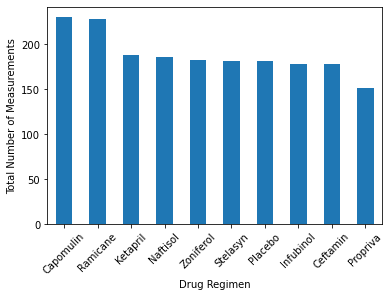

In [54]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Total Number of Measurements")
plt.show()




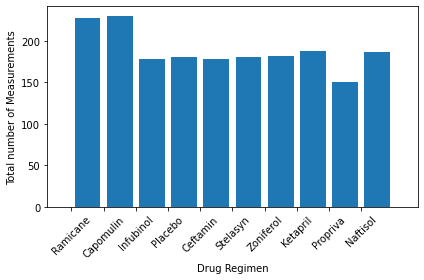

In [62]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bins = range(11)
plt.hist(clean_df['Drug Regimen'], bins = bins, rwidth=0.8)
plt.xlabel("Drug Regimen")
plt.xlim(-0.75, len(bins)-0.25)
plt.xticks(rotation=45)
plt.ylabel("Total number of Measurements")
plt.tight_layout()
plt.show()




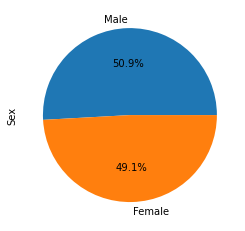

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_df['Sex'].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")

plt.show()





([<matplotlib.patches.Wedge at 0x257689a8ca0>,
 [Text(-0.6836045317386269, -0.8617916477817669, 'Male'),
  Text(0.683604531738627, 0.8617916477817666, 'Female')],
 [Text(-0.3728751991301601, -0.47006817151732727, '50.9%'),
  Text(0.37287519913016015, 0.4700681715173272, '49.1%')])

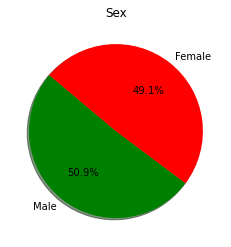

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male","Female"]
colors = ["green","red"]
plt.title('Sex')
plt.pie(counts,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cap_last = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]

cap_vol = pd.DataFrame(cap_last)

cap_merge = pd.merge(cap_vol, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

cap_merge_final = cap_merge.loc[(cap_merge["Drug Regimen"] == "Capomulin"),:]

cap_merge_final








,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
81,i557,45,Capomulin,Female,1,24,47.685963,1
84,i738,45,Capomulin,Female,23,20,37.311846,2
86,j119,45,Capomulin,Female,7,23,38.125164,1
88,j246,35,Capomulin,Female,21,21,38.753265,1
109,l509,45,Capomulin,Male,17,21,41.483008,3


In [95]:
ram_last = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]

ram_vol = pd.DataFrame(ram_last)

ram_merge = pd.merge(ram_vol, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

ram_merge_final = ram_merge.loc[(ram_merge["Drug Regimen"] == "Ramicane"),:]

ram_merge_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
12,a644,45,Ramicane,Female,7,17,32.978522,1
33,c458,30,Ramicane,Female,23,20,38.342008,2
37,c758,45,Ramicane,Male,9,17,33.397653,1
45,d251,45,Ramicane,Female,8,19,37.311236,2
52,e662,45,Ramicane,Male,8,24,40.659006,2
70,g791,45,Ramicane,Male,11,16,29.128472,1
77,i177,45,Ramicane,Male,10,18,33.562402,3


In [98]:
infu_last = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]

infu_vol = pd.DataFrame(infu_last)

infu_merge = pd.merge(infu_vol, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

infu_merge_final = infu_merge.loc[(infu_merge["Drug Regimen"] == "Infubinol"),:]

infu_merge_final


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
13,a685,45,Infubinol,Male,8,30,66.083066,3
27,c139,45,Infubinol,Male,11,28,72.226731,2
31,c326,5,Infubinol,Female,18,25,36.321346,0
41,c895,30,Infubinol,Female,7,29,60.969711,2
50,e476,45,Infubinol,Male,23,26,62.435404,1
56,f345,45,Infubinol,Male,23,26,60.918767,1
79,i386,40,Infubinol,Female,23,29,67.289621,4


In [99]:
ceft_last = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]

ceft_vol = pd.DataFrame(ceft_last)

ceft_merge = pd.merge(ceft_vol, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

ceft_merge_final = ceft_merge.loc[(ceft_merge["Drug Regimen"] == "Ceftamin"),:]

ceft_merge_final


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
3,a275,45,Ceftamin,Female,20,28,62.999356,3
21,b447,0,Ceftamin,Male,2,30,45.000000,0
22,b487,25,Ceftamin,Female,6,28,56.057749,1
25,b759,30,Ceftamin,Female,12,25,55.742829,1
58,f436,15,Ceftamin,Female,3,25,48.722078,2
76,h531,5,Ceftamin,Male,5,27,47.784682,0
89,j296,45,Ceftamin,Female,24,30,61.849023,3
95,k210,45,Ceftamin,Male,15,28,68.923185,3
107,l471,45,Ceftamin,Female,7,28,67.748662,1
108,l490,30,Ceftamin,Male,24,26,57.918381,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

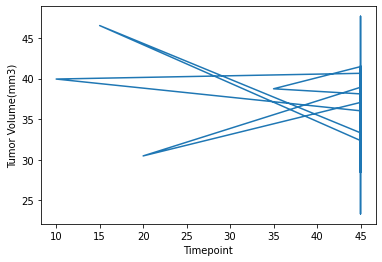

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmulin_average = cap_merge_final.groupby(['Mouse ID']).mean()
plt.plot(capmulin_average['Timepoint'], capmulin_average['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume(mm3)')
plt.show


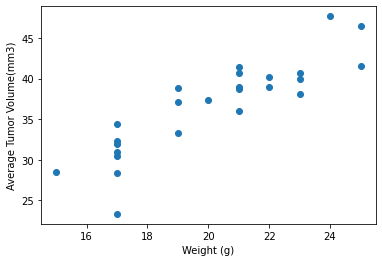

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capmulin_average = cap_merge_final.groupby(['Mouse ID']).mean()
plt.scatter(capmulin_average['Weight (g)'], capmulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()

## Correlation and Regression

In [101]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.pearsonr(capmulin_average['Weight (g)'], capmulin_average['Tumor Volume (mm3)'])


(0.8767060403658116, 9.08442908867345e-09)